<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Drop-Unnecessary-Variable" data-toc-modified-id="1.-Drop-Unnecessary-Variable-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Drop Unnecessary Variable</a></span></li><li><span><a href="#2.-Clean-Date-and-Time" data-toc-modified-id="2.-Clean-Date-and-Time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Clean Date and Time</a></span></li><li><span><a href="#3.-Age" data-toc-modified-id="3.-Age-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Age</a></span></li><li><span><a href="#4-Regions" data-toc-modified-id="4-Regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4 Regions</a></span></li><li><span><a href="#5.-Data-filtering" data-toc-modified-id="5.-Data-filtering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. Data filtering</a></span></li><li><span><a href="#5.-Quarantine-Status" data-toc-modified-id="5.-Quarantine-Status-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>5. Quarantine Status</a></span></li><li><span><a href="#QL" data-toc-modified-id="QL-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>QL</a></span></li><li><span><a href="#4.-Retain-Final-Column" data-toc-modified-id="4.-Retain-Final-Column-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>4. Retain Final Column</a></span></li><li><span><a href="#One-hot-encode" data-toc-modified-id="One-hot-encode-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>One hot encode</a></span></li></ul></div>

In [1]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")
from datetime import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
cc_fraud = pd.read_csv(
    "group1_dataset.csv")

display(cc_fraud.shape, cc_fraud.head())

(100000, 25)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,0721-7502166-2,2.283050e+15,Jerry,Warren,M,"953 Baker Street, Azalea Grove",Dipolog,PH,130759,8.5667,...,092251bc2883d9c864541295a8c5c928,07/05/2021,5:05:28,1620363928,shopping_net,91.70,0,Carousell,8.033511,123.834444
1,0721-7502166-2,2.283050e+15,Jerry,Warren,M,"953 Baker Street, Azalea Grove",Dipolog,PH,130759,8.5667,...,06a41ed08ab9879fcc95229d8181a747,03/07/2021,12:13:55,1625314435,kids_pets,246.42,0,Bioresearch,9.446718,124.154834
2,0721-7502166-2,2.283050e+15,Jerry,Warren,M,"953 Baker Street, Azalea Grove",Dipolog,PH,130759,8.5667,...,dd47afd432655aa2f9fabb2d4f9793fc,15/09/2021,6:32:24,1631687544,gas_transport,85.73,0,SeaOil Philippines Inc.,9.069974,123.933139
3,0721-7502166-2,2.283050e+15,Jerry,Warren,M,"953 Baker Street, Azalea Grove",Dipolog,PH,130759,8.5667,...,0ecb89df9b255ac977aa918eb3dd0157,10/06/2020,11:37:53,1591789073,entertainment,7.75,0,Starmedia Entertainment,7.849510,123.961913
4,0721-7502166-2,2.283050e+15,Jerry,Warren,M,"953 Baker Street, Azalea Grove",Dipolog,PH,130759,8.5667,...,8bad8b073436ab689e05bf807c0c2cc6,30/11/2020,9:42:53,1606729373,gas_transport,58.55,0,Caltex (Chevron Corporation),9.103602,124.060359


In [3]:
cc_fraud["full_name"] = cc_fraud["first"] + ' ' + cc_fraud['last'] 

unique_client = cc_fraud['full_name'].nunique()

print(f'Total number of unique client: {unique_client}')

Total number of unique client: 93


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Data Cleaning and Preprocessing </span></div>

### 1. Drop Unnecessary Variable

In [4]:
#drop unnecessary variables to dataset
to_drop = ['first', 'last', 'street',
           'zip', 'trans_num', 'unix_time','acct_num']

cc_clean = cc_fraud.drop(to_drop, axis=1)    

cc_clean.head()

,ssn,cc_num,gender,city,state,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,full_name
0,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,07/05/2021,5:05:28,shopping_net,91.70,0,Carousell,8.033511,123.834444,Jerry Warren
1,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,03/07/2021,12:13:55,kids_pets,246.42,0,Bioresearch,9.446718,124.154834,Jerry Warren
2,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,15/09/2021,6:32:24,gas_transport,85.73,0,SeaOil Philippines Inc.,9.069974,123.933139,Jerry Warren
3,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,10/06/2020,11:37:53,entertainment,7.75,0,Starmedia Entertainment,7.849510,123.961913,Jerry Warren
4,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,30/11/2020,9:42:53,gas_transport,58.55,0,Caltex (Chevron Corporation),9.103602,124.060359,Jerry Warren


### 2. Clean Date and Time

In [5]:
#transaction data
cc_clean['trans_date'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_time'] = pd.to_datetime(cc_clean['trans_time'])
#cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date

#treat year as str not int
cc_clean['trans_year'] = cc_clean['trans_date'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_date'].dt.month
cc_clean['trans_day'] = cc_clean['trans_date'].dt.day

#transaction time
cc_clean['trans_hour'] = cc_clean['trans_time'].dt.hour
#convert month to string
month_map = {1: 'Jan', 
             2: 'Feb', 
             3: 'Mar',
             4: 'Apr', 
             5: 'May', 
             6: 'Jun',
             7: 'July', 
             8: 'Aug',
             9: 'Sep',
            10: 'Oct', 
            11: 'Nov',
            12: 'Dec'}

cc_clean['trans_month_str'] = cc_clean['trans_month'].map(month_map)

In [6]:
def get_part_of_day(hour):
    if (hour> 22) or (hour<=6):
        return 'early morning'
    elif hour <= 11:
        return 'breakfast'
    elif hour <= 14:
        return 'lunch'
    elif hour <= 17:
        return 'afternoon'
    else:
        return 'evening'
    
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)

### 3. Age

In [7]:
cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
#cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob_datetime'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)

cc_clean.head()

,ssn,cc_num,gender,city,state,lat,long,city_pop,job,dob,...,merch_long,full_name,trans_year,trans_month,trans_day,trans_hour,trans_month_str,part_of_day,dob_datetime,age
0,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,...,123.834444,Jerry Warren,2021,7,5,5,July,early morning,1963-10-02,57
1,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,...,124.154834,Jerry Warren,2021,3,7,12,Mar,lunch,1963-10-02,57
2,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,...,123.933139,Jerry Warren,2021,9,15,6,Sep,early morning,1963-10-02,57
3,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,...,123.961913,Jerry Warren,2020,10,6,11,Oct,breakfast,1963-10-02,57
4,0721-7502166-2,2.283050e+15,M,Dipolog,PH,8.5667,123.3333,130759,Archivist,10/02/1963,...,124.060359,Jerry Warren,2020,11,30,9,Nov,breakfast,1963-10-02,57


### 4 Regions

In [8]:
cc_clean.loc[(cc_clean['city']=="San Fernando") & (cc_clean['city_pop'] == 306659), 'city'] = "San Fernando City"


In [9]:
region_1 =['Dagupan City', 'San Carlos', 'Alaminos', 'Urdaneta', 'Laoag', 'Vigan', 'Candon','San Fernando']
region_2= ['Tuguegarao', 'Cauayan', 'Ilagan', 'Santiago']
region_3 =['Balanga', 'Malolos', 'Meycauayan', 'San Jose del Monte', 'Cabanatuan City',
           'Gapan', 'Munoz', 'Palayan City', 'Angeles City', 'Mabalacat', 'San Fernando City',
           'Tarlac City', 'Olongapo', 'San Jose']
region_4a = ['Batangas', 'Lipa City', 'Tanauan', 'Bacoor', 'Cavite', 'Dasmarinas', 'Imus',
            'Tagaytay', 'Trece Martices', 'Binan', 'Cabuyao', 'San Pablo', 'Santa Rosa', 'San Pedro',
            'Lucena', 'Tayabas', 'Antipolo', 'City of Calamba', 'General Trias']
region_4b = ['Calapan', 'Puerto Princesa']
region_5 =['Legazpi City', 'Ligao', 'Tabaco', 'Iriga', 'Naga City', 'Masbate', 'Sorsogon']
region_6 = ['Roxas City', 'Iloilo', 'Passi', 'Bacolod', 'Bago', 'Cadiz', 'Escalante', 'Himamaylan',
           'Kabankalan', 'La Carlota', 'Sagay', 'San Carlos', 'Silay', 'Sipalay', 
           'Talisay', 'Victorias']
region_7 = ['Tagbilaran City', 'Bogo', 'Carcar', 'Cebu City', 'Danao', 'Lapu-Lapu', 'Mandaue City', 'Bais',
           'Bayawan', 'Canlaon', 'Dumaguete City', 'Guihulngan', 'Tanjay']
region_8 = ['Borongan', 'Baybay', 'Ormoc', 'Tacloban', 'Calbayog', 'Catbalogan', 'Maasin']
region_9 = ['City of Isabela', 'Dapitan', 'Dipolog', 'Pagadian', 'Zamboanga City']
region_10 = ['Malaybalay', 'Valencia', 'Iligan', 'Oroquieta', 'Ozamiz', 'Tangub', 'Cagayan de Oro',
            'El Salvador', 'Gingoog']
region_11 = ['Panabo', 'Samal' ,'Tagum', 'Davao', 'Digos', 'Mati']
region_12 = ['Kidapawan','Cotabato', 'General Santos', 'Koronadal', 'Tacurong' ]
region_13 = ['Butuan', 'Cabadbaran', 'Bayugan', 'Surigao', 'Bislig', 'Tandag']
armm = ['Lawitan', 'Marawi']
car = ['Baguio City', 'Tabuk']
ncr = ['Caloocan City', 'Las Pinas City', 'Manila' , 'Makati City', 'Malabon', 'Mandaluyong City', 'Manila',
      'Marikina City', 'Muntinlupa City', 'Navotas', 'City of Paranaque', 'Pasay City', 'Pasig City', 'San Juan', 
      'Taguig City', 'Valenzuela', 'Quezon City']

           
    
def get_regions(city):
    if city in region_1:
        return "Region 1"
    elif city in region_2:
        return "Region 2"
    elif city in region_3:
        return "Region 3"
    elif city in region_4a:
        return "CALABARZON"
    elif city in region_4b:
        return "MIMAROPA"
    elif city in region_5:
        return "Region 5"
    elif city in region_6:
        return "Region 6"
    elif city in region_7:
        return "Region 7"
    elif city in region_8:
        return "Region 8"
    elif city in region_9:
        return "Region 9"
    elif city in region_10:
        return "Region 10"
    elif city in region_11:
        return "Region 11"
    elif city in region_12:
        return "Region 12"
    elif city in region_13:
        return "Region 13"
    elif city in armm:
        return "ARMM"
    elif city in car:
        return "CAR"
    elif city in ncr:
        return "NCR"
    else:
        return "Other regions"
    
cc_clean.loc[:, 'region'] = cc_clean['city'].apply(get_regions)


### 5. Data filtering 

In [10]:
regions = ["NCR", "CALABARZON", "Region 3"]

cc_data = cc_clean[cc_clean['region'].isin(regions)]

In [11]:
cat_focus = ['shopping_pos','gas_transport','grocery_pos','grocery_net','shopping_net','kids_pets','home','personal_care','health_fitness']

cc_data = cc_data[cc_data['category'].isin(cat_focus)]

### 5. Quarantine Status

In [12]:
laguna = ['Binan', 'Cabuyao', 'San Pablo', 'Santa Rosa', 'San Pedro','City of Calamba']
cavite = ['Bacoor', 'Cavite', 'Dasmarinas', 'Imus','Tagaytay', 'Trece Martices','General Trias']
batangas = ['Batangas', 'Lipa City', 'Tanauan']
rizal =['Antipolo']
quezon = ['Lucena', 'Tayabas']
bataan = ['Balanga']
bulacan = ['Malolos', 'Meycauayan', 'San Jose del Monte']
nueva_ecija=['Cabanatuan City','Gapan', 'Munoz', 'Palayan City', 'San Jose']
pampanga = ['Angeles City', 'Mabalacat', 'San Fernando City']
tarlac = ['Tarlac City']
zambales = ['Olongapo']

conditions = [
    (cc_data['trans_date'] >= datetime(2020,1, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 3, 8, 0, 0,0)),
    (cc_data['trans_date'] >= datetime(2020, 3, 8,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 5, 15, 0, 0,0)),
    (cc_data['trans_date'] >= datetime(2020, 5, 16,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 5, 31, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2020, 6, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 7, 28, 0, 0,0)),
    (cc_data['trans_date'] >= datetime(2020, 7, 29,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 8, 18, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2020, 8, 19,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 3, 22, 0, 0,0)),
    (cc_data['trans_date'] >= datetime(2021, 3, 23,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 4, 11, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2021, 4, 12,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 5, 14, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2021, 5, 15,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 7, 31, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2021, 8, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 8, 20, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2021, 8, 21,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 8, 31, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2021, 9, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 12, 31, 0, 0,0)) & (cc_data['region'] == "NCR"),
    (cc_data['trans_date'] >= datetime(2020, 5, 16,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 5, 31, 0, 0,0)) & (cc_data['city'].isin(cavite)) | (cc_data['city'].isin(batangas)) | (cc_data['city'].isin(rizal)) | (cc_data['city'].isin(quezon)) | (cc_data['city'].isin(tarlac)),
    (cc_data['trans_date'] >= datetime(2020, 5, 16,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 5, 31, 0, 0,0)) & (cc_data['city'].isin(laguna)) | (cc_data['city'].isin(pampanga)) | (cc_data['city'].isin(nueva_ecija)) | (cc_data['city'].isin(zambales)) | (cc_data['city'].isin(bulacan)) | (cc_data['city'].isin(bataan)),
    (cc_data['trans_date'] >= datetime(2020, 7, 29,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 8, 18, 0, 0,0)) & (cc_data['city'].isin(laguna)) |  (cc_data['city'].isin(cavite)) | (cc_data['city'].isin(rizal)) | (cc_data['city'].isin(bulacan)) ,
    (cc_data['trans_date'] >= datetime(2020, 7, 29,0,0,0)) & (cc_data['trans_date'] <= datetime(2020, 8, 18, 0, 0,0)) & (cc_data['city'].isin(batangas)) | (cc_data['city'].isin(quezon)) | (cc_data['city'].isin(tarlac)) | (cc_data['city'].isin(pampanga)) | (cc_data['city'].isin(nueva_ecija)) | (cc_data['city'].isin(zambales)) | (cc_data['city'].isin(bataan)),
    (cc_data['trans_date'] >= datetime(2021, 3, 23,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 4, 11, 0, 0,0)) & (cc_data['city'].isin(laguna)) |  (cc_data['city'].isin(cavite)) | (cc_data['city'].isin(rizal)) | (cc_data['city'].isin(bulacan)) ,
    (cc_data['trans_date'] >= datetime(2021, 3, 23,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 4, 11, 0, 0,0)) & (cc_data['city'].isin(batangas)) | (cc_data['city'].isin(quezon)) | (cc_data['city'].isin(tarlac)) | (cc_data['city'].isin(pampanga)) | (cc_data['city'].isin(nueva_ecija)) | (cc_data['city'].isin(zambales)) | (cc_data['city'].isin(bataan)),
    (cc_data['trans_date'] >= datetime(2021, 4, 12,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 5, 14, 0, 0,0)) & (cc_data['city'].isin(laguna)) |  (cc_data['city'].isin(cavite)) | (cc_data['city'].isin(rizal)) | (cc_data['city'].isin(bulacan)) ,
    (cc_data['trans_date'] >= datetime(2021, 4, 12,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 5, 14, 0, 0,0)) & (cc_data['city'].isin(batangas)) | (cc_data['city'].isin(quezon)) | (cc_data['city'].isin(tarlac)) | (cc_data['city'].isin(pampanga)) | (cc_data['city'].isin(nueva_ecija)) | (cc_data['city'].isin(zambales)) | (cc_data['city'].isin(bataan)),
    (cc_data['trans_date'] >= datetime(2021, 5, 15,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 7, 30, 0, 0,0)) & (cc_data['region'] == "Region 3"),
    (cc_data['trans_date'] >= datetime(2021, 8, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 8, 20, 0, 0,0)) & (cc_data['city'].isin(bataan)),
    (cc_data['trans_date'] >= datetime(2021, 8, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 8, 20, 0, 0,0)) & (cc_data['city'].isin(tarlac)) | (cc_data['city'].isin(pampanga)) | (cc_data['city'].isin(nueva_ecija)) | (cc_data['city'].isin(zambales)),
    (cc_data['trans_date'] >= datetime(2021, 8, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 8, 9, 0, 0,0)) & (cc_data['city'].isin(bulacan)),
    (cc_data['trans_date'] >= datetime(2021, 8, 10,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 8, 31, 0, 0,0)) & (cc_data['city'].isin(bulacan)),
    (cc_data['trans_date'] >= datetime(2021, 8, 21,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 12, 31, 0, 0,0)) &  (cc_data['city'].isin(tarlac)) | (cc_data['city'].isin(pampanga)) | (cc_data['city'].isin(nueva_ecija)) | (cc_data['city'].isin(zambales)) | (cc_data['city'].isin(bataan)),
    (cc_data['trans_date'] >= datetime(2021, 9, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 12, 31, 0, 0,0)) & (cc_data['city'].isin(bulacan)),
    (cc_data['trans_date'] >= datetime(2021, 5, 15,0,0,0))& (cc_data['trans_date'] <= datetime(2021, 8, 8, 0, 0,0))  & (cc_data['region'] == "CALABARZON"),
    (cc_data['trans_date'] >= datetime(2021, 8, 8,0,0,0))& (cc_data['trans_date'] <= datetime(2021, 8, 31, 0, 0,0)) & (cc_data['city'].isin(laguna)) | (cc_data['city'].isin(cavite)) | (cc_data['city'].isin(rizal)),
    (cc_data['trans_date'] >= datetime(2021, 8, 8,0,0,0))& (cc_data['trans_date'] <= datetime(2021, 8, 31, 0, 0,0)) & (cc_data['city'].isin(batangas)) | (cc_data['city'].isin(quezon)),
    (cc_data['trans_date'] >= datetime(2021, 9, 1,0,0,0)) & (cc_data['trans_date'] <= datetime(2021, 12, 31, 0, 0,0)) & (cc_data['region']=='CALABARZON')
]  

choices = [ 'Normal','ECQ', 'MECQ', 'GCQ', "MECQ", 'GCQ', 'ECQ', 'MECQ', 'GCQ', 'ECQ','MECQ','GCQ', 'GCQ', 'MECQ', 'MECQ', 'GCQ', 'ECQ', 'GCQ', 'MECQ', 'GCQ', 'GCQ', 'ECQ', 'GCQ', 'GCQ', 'MECQ', 'GCQ', 'GCQ', 'GCQ', 'MECQ', 'GCQ', 'GCQ']

In [13]:
cc_data['quarantine_status'] = np.select(conditions, choices, default="None")

### QL

In [14]:
extreme_ql = ['ECQ', 'MECQ']
others = ['GCQ', 'Normal']

condition2=[
    cc_data['quarantine_status'].isin(extreme_ql),
    cc_data['quarantine_status'].isin(others)
]

choices2 = ['Extreme QL', 'Moderate-Low QL']

cc_data['QL'] = np.select(condition2, choices2, default="None")

In [25]:
cc_data

,ssn,cc_num,gender,city,state,lat,long,city_pop,job,dob,...,trans_month,trans_day,trans_hour,trans_month_str,part_of_day,dob_datetime,age,region,quarantine_status,QL
31,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,20/11/1948,...,9,13,13,Sep,lunch,1948-11-20,71,NCR,GCQ,Moderate-Low QL
32,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,20/11/1948,...,9,13,23,Sep,early morning,1948-11-20,71,NCR,GCQ,Moderate-Low QL
33,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,20/11/1948,...,9,14,3,Sep,early morning,1948-11-20,71,NCR,GCQ,Moderate-Low QL
34,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,20/11/1948,...,9,14,22,Sep,evening,1948-11-20,71,NCR,GCQ,Moderate-Low QL
36,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,20/11/1948,...,9,14,6,Sep,early morning,1948-11-20,71,NCR,GCQ,Moderate-Low QL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0476-2627741-4,3.576610e+15,M,Mandaluyong City,PH,14.5833,121.0333,386276,Air traffic controller,23/02/1958,...,6,20,1,Jun,early morning,1958-02-23,62,NCR,GCQ,Moderate-Low QL
99994,0476-2627741-4,3.576610e+15,M,Mandaluyong City,PH,14.5833,121.0333,386276,Air traffic controller,23/02/1958,...,8,14,13,Aug,lunch,1958-02-23,63,NCR,ECQ,Extreme QL
99997,0476-2627741-4,3.576610e+15,M,Mandaluyong City,PH,14.5833,121.0333,386276,Air traffic controller,23/02/1958,...,1,25,11,Jan,breakfast,1958-02-23,62,NCR,GCQ,Moderate-Low QL
99998,0476-2627741-4,3.576610e+15,M,Mandaluyong City,PH,14.5833,121.0333,386276,Air traffic controller,23/02/1958,...,8,4,22,Aug,evening,1958-02-23,62,NCR,MECQ,Extreme QL


### 4. Retain Final Column

In [16]:
to_drop2 = ['dob', 'trans_month', 'dob_datetime', 'trans_time', 'trans_hour']
cc_final = cc_data.drop(to_drop2, axis=1)

cc_final.head()

,ssn,cc_num,gender,city,state,lat,long,city_pop,job,trans_date,...,merch_long,full_name,trans_year,trans_day,trans_month_str,part_of_day,age,region,quarantine_status,QL
31,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,2020-09-13,...,121.223118,Mark Diaz,2020,13,Sep,lunch,71,NCR,GCQ,Moderate-Low QL
32,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,2020-09-13,...,120.246084,Mark Diaz,2020,13,Sep,early morning,71,NCR,GCQ,Moderate-Low QL
33,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,2020-09-14,...,121.332516,Mark Diaz,2020,14,Sep,early morning,71,NCR,GCQ,Moderate-Low QL
34,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,2020-09-14,...,121.955649,Mark Diaz,2020,14,Sep,evening,71,NCR,GCQ,Moderate-Low QL
36,3526-9799115-3,3.007890e+13,M,Manila,PH,14.5958,120.9772,23088000,Database administrator,2020-09-14,...,121.696662,Mark Diaz,2020,14,Sep,early morning,71,NCR,GCQ,Moderate-Low QL


### One hot encode

In [17]:
to_drop3 = []

for col in tqdm(cc_final.columns):
    if cc_final[col].dtype == 'O':
        dummies = pd.get_dummies(cc_final[col], prefix=col, drop_first=False)
        cc_final = pd.concat([cc_final, dummies], axis=1)
        to_drop3.append(col)
        
cc_final = cc_final.drop(to_drop3, axis=1)
cc_final.to_csv("cc_df_group1.csv", index=False)

100%|█████████████████████████████████████████████████| 25/25 [00:00<00:00, 154.25it/s]


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exploratory Data Analysis </span></div>

valid    29677
fraud      300
Name: Class, dtype: int64

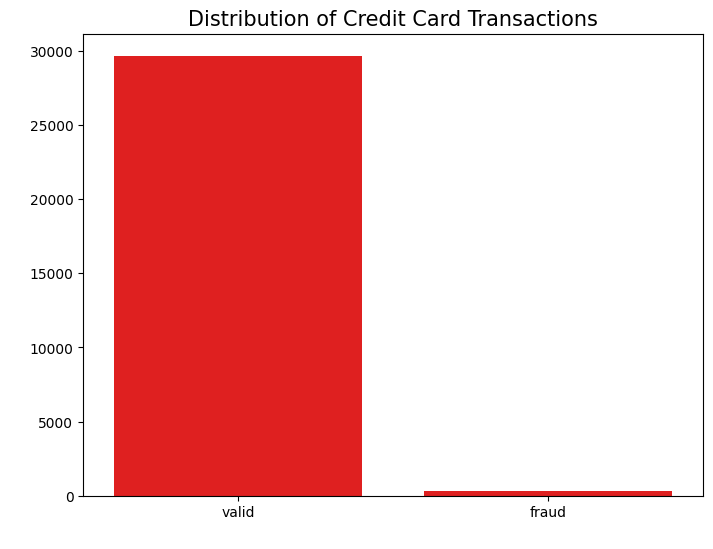

In [24]:
fraud_map = {0: 'valid',
            1: 'fraud'}

cc_fraud_eda = cc_data.copy()
cc_fraud_eda['Class'] = cc_fraud_eda['is_fraud'].map(fraud_map)

fig,ax = plt.subplots(figsize=(8,6))
ax=sns.countplot(x=cc_fraud_eda['Class'],
              order=cc_fraud_eda['Class'].value_counts().index,
                color='red')

ax.set_xlabel(' ')
ax.set_ylabel(' ')

ax.set_title('Distribution of Credit Card Transactions', size=15, y=1)
display(cc_fraud_eda['Class'].value_counts())
plt.show()

Male    29977
Name: Gender_, dtype: int64

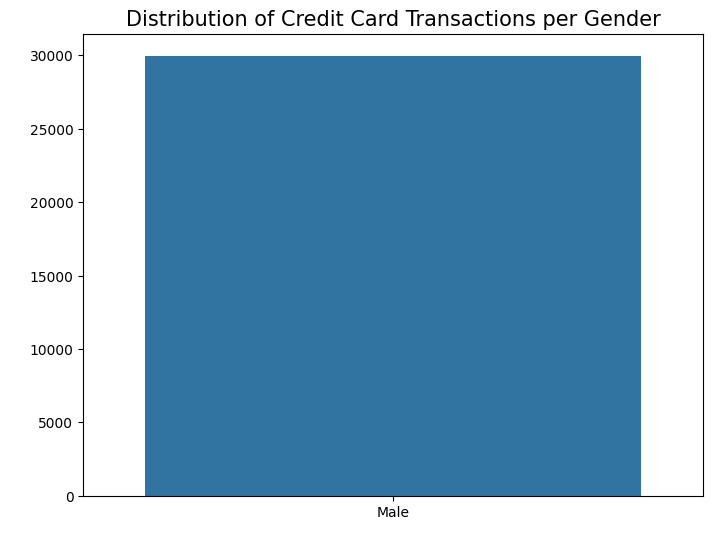

In [26]:
gender_map = {'M': 'Male',
            'F': 'Female'}

cc_fraud_eda['Gender_'] = cc_fraud_eda['gender'].map(gender_map)

fig,ax = plt.subplots(figsize=(8,6))
ax=sns.countplot(x=cc_fraud_eda['Gender_'],
              order=cc_fraud_eda['Gender_'].value_counts().index)

ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_title('Distribution of Credit Card Transactions per Gender', size=15, y=1)
display(cc_fraud_eda['Gender_'].value_counts())
plt.show()

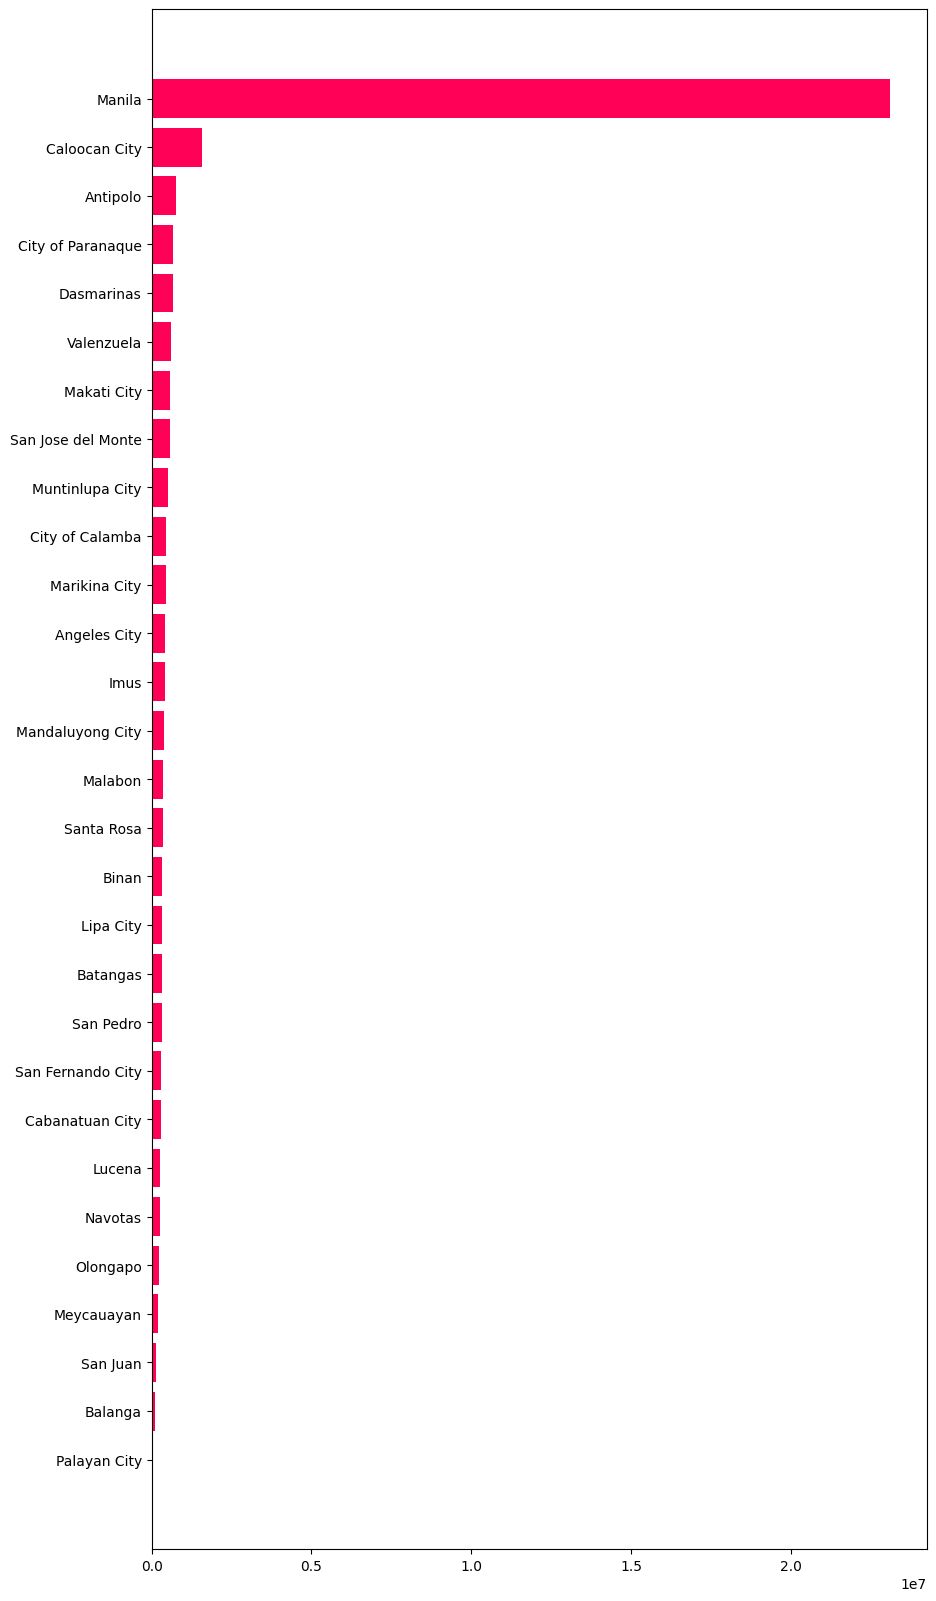

In [27]:
cc_city= cc_fraud_eda.drop_duplicates(subset=['city'])\
            .reset_index(drop=True).sort_values(['city_pop'])

colors_l = ['lightgray'] * 85
colors_l = ['#ff0257'] * 1

fig,ax = plt.subplots(figsize=(10,20))
ax.barh(cc_city.city, cc_city.city_pop, color=colors_l)

plt.show()

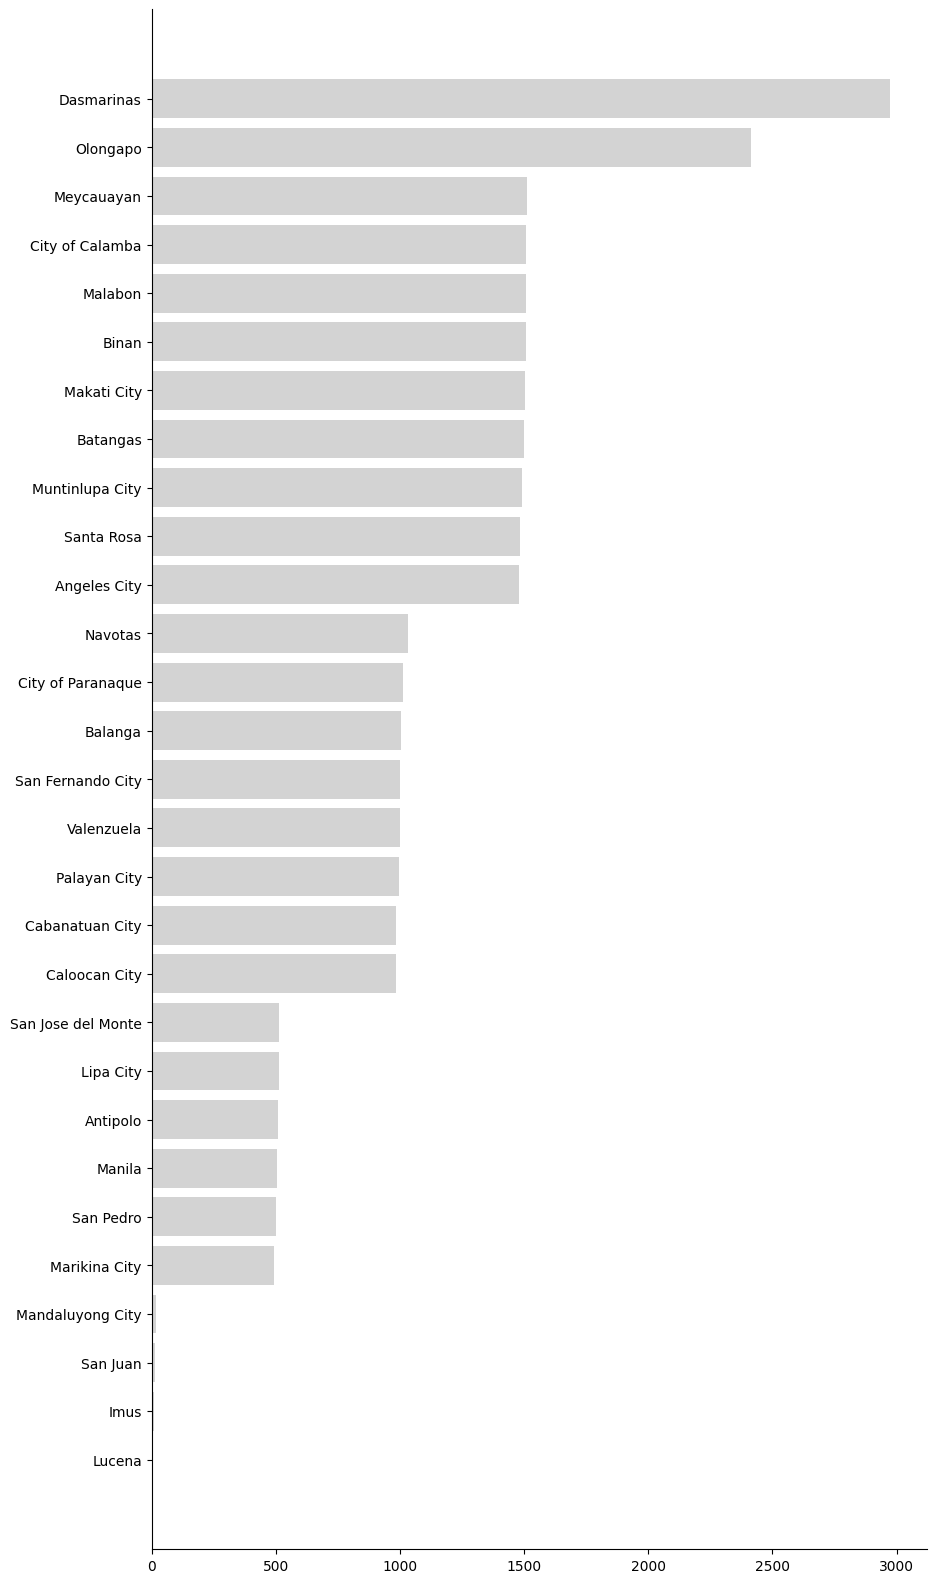

In [28]:
cc_city_2 = pd.DataFrame({'trans_count': cc_fraud_eda['city'].value_counts().sort_values()})

colors_h = ['lightgray'] * 85
colors_h[-3:] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city_2.index, cc_city_2.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

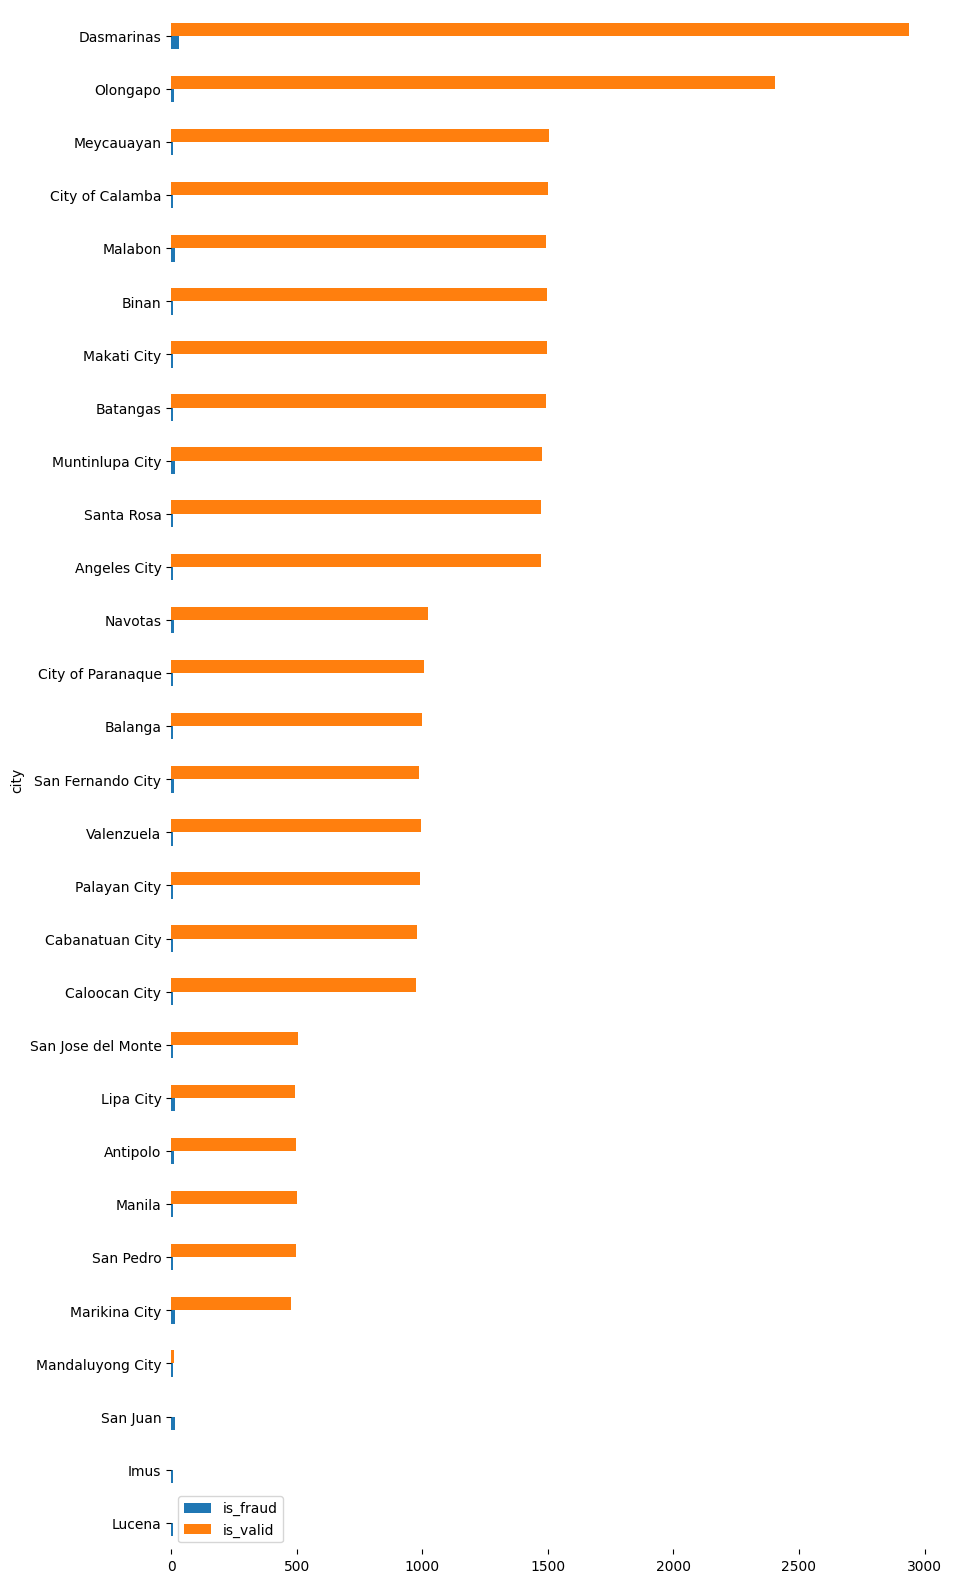

In [29]:
cc_city_3 = pd.DataFrame(cc_fraud_eda.groupby('city')['is_fraud'].sum())
cc_city_3 = cc_city_3.join(cc_city_2).sort_values(['trans_count'])
cc_city_3['is_valid'] = cc_city_3['trans_count'] - cc_city_3['is_fraud']
cc_city_3 = cc_city_3[['is_fraud', 'is_valid']]

cc_city_3.plot.barh(figsize=(10,20))
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.show()

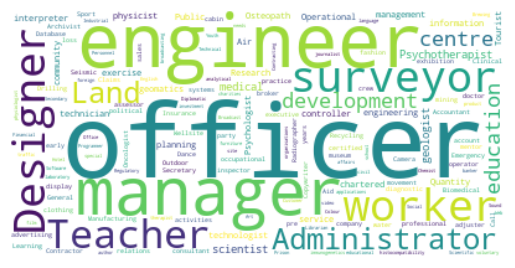

In [30]:
cc_jobs = cc_fraud.drop_duplicates(subset=['full_name']).reset_index(drop=True)


words=[]
for phrase in cc_jobs['job'].values:
    for word in phrase.split():
        words.append(word)
        
jobs_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='white',
                     collocations=False).generate(jobs_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

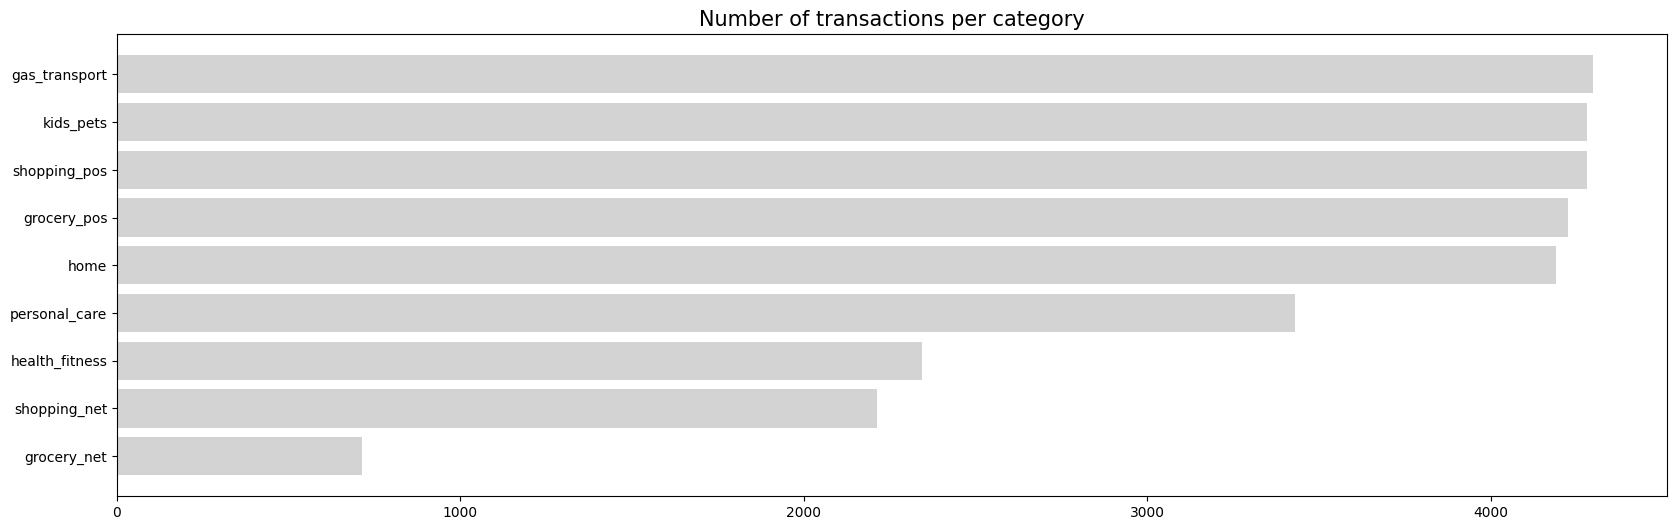

In [31]:
cc_mc= pd.DataFrame(cc_fraud_eda['category'].value_counts()).sort_values("category")

colors_l = ['lightgray'] * 14
colors_l[-1:0] = ['red'] *1

fig, ax = plt.subplots(figsize=(20,6))
ax.barh(cc_mc.index, cc_mc.category, color=colors_l)

ax.set_title('Number of transactions per category', size=15, y=1)
plt.show()

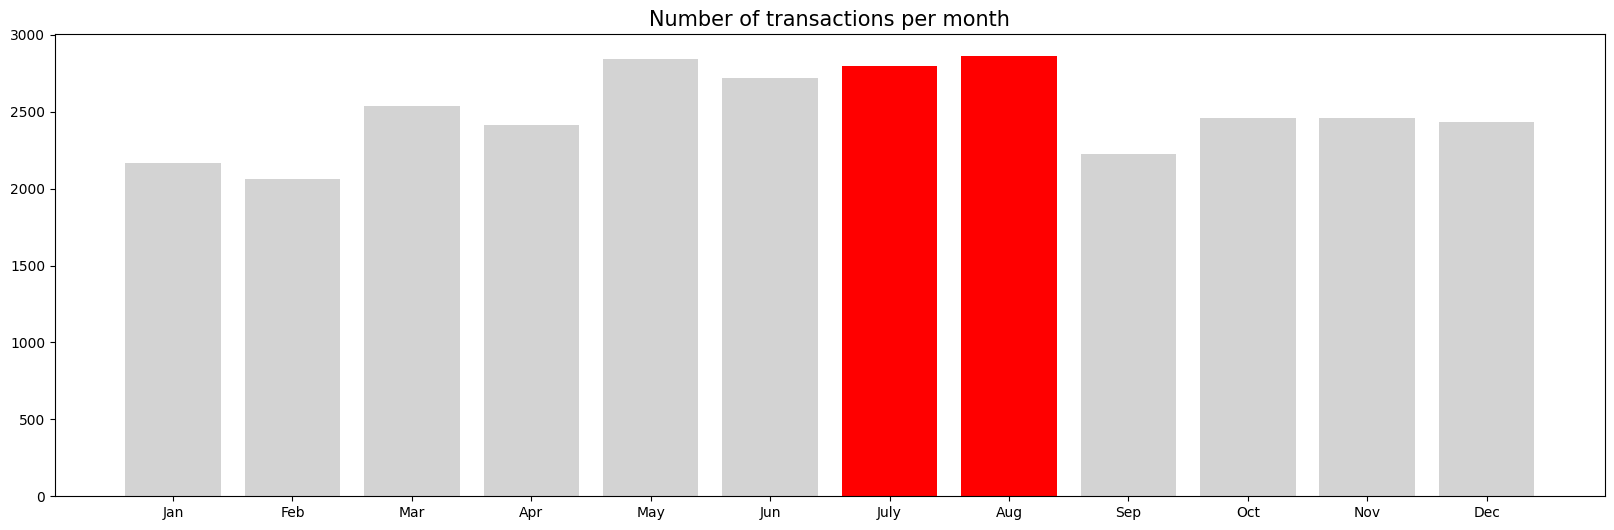

In [32]:
date= pd.DataFrame(cc_fraud_eda['trans_month_str'].value_counts()).reset_index().sort_values(['index'])

map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', "trans_month_str"]]
map_month.columns= ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['lightgray'] * 14
colors_d[6:8] = ['red'] *2

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(cc_date['index'], cc_date['trans_month_str'], color=colors_d)

ax.set_title('Number of transactions per month', size=15, y=1)
plt.show()

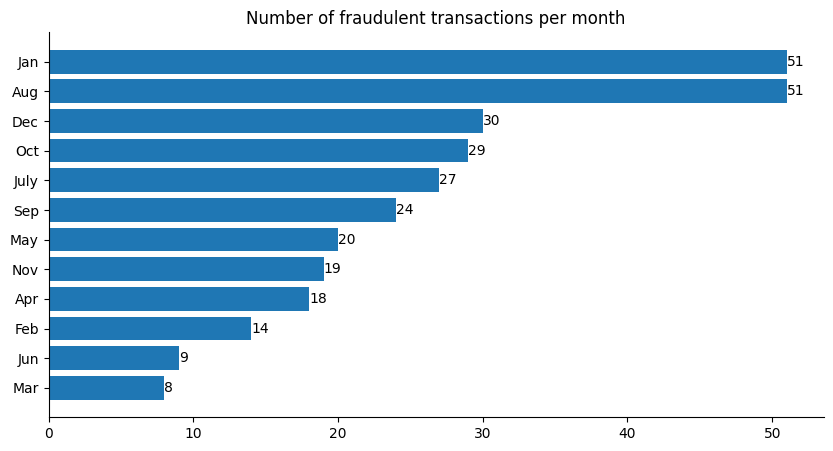

In [33]:
month_fraud= cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
month_fraud = pd.DataFrame(month_fraud['trans_month_str'].value_counts()).reset_index().sort_values('trans_month_str',ascending=True)

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(month_fraud['index'], month_fraud.trans_month_str)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraudulent transactions per month')
ax.bar_label(hbar)
plt.show()

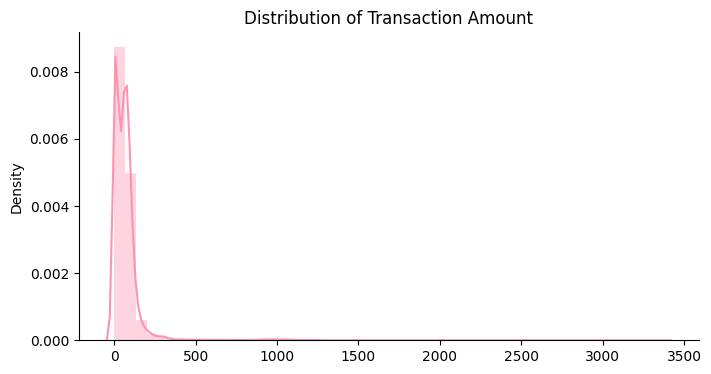

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(cc_fraud_eda['amt'].values, ax=ax, color="#FC94AF")
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Distribution of Transaction Amount')
plt.show()

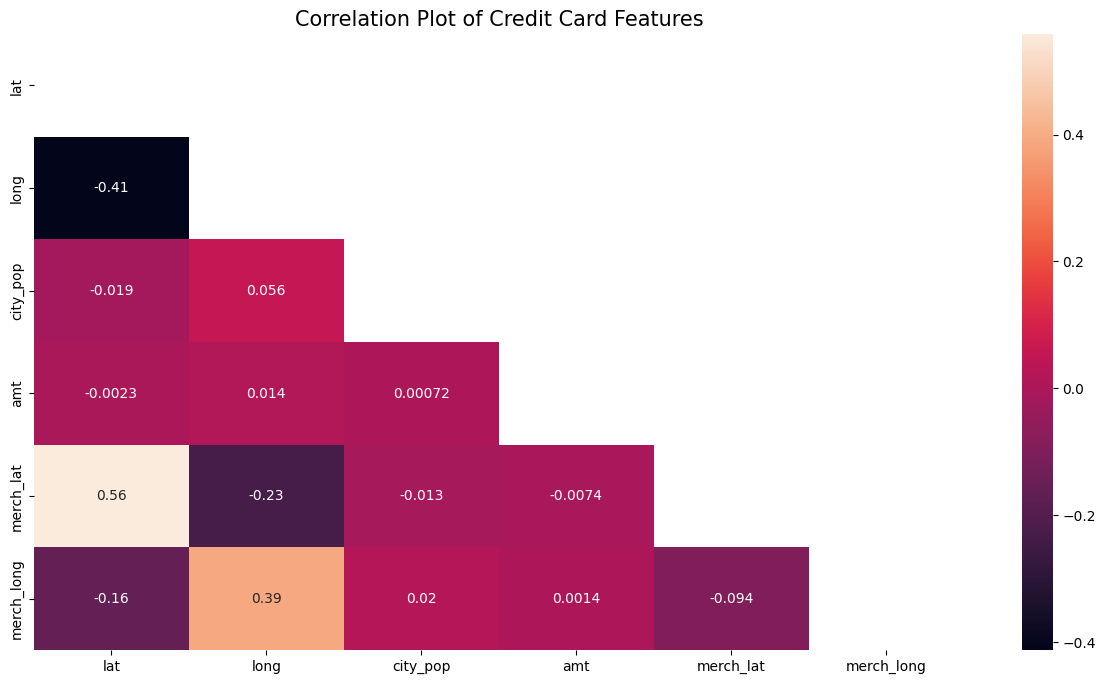

In [35]:
quant = cc_fraud_eda[['lat', 'long', 'city_pop', 'amt', 'merch_lat', 'merch_long']]

corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation Plot of Credit Card Features", fontsize=15, y=1)
plt.show()

In [36]:
df_target = cc_final['is_fraud']

state_counts = Counter(df_target)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num = (df_state[0]/df_state[0].sum()) ** 2

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

Proportion Chance Criterion: 98.02%
1.25 * Proportion Chance Criterion: 122.52%


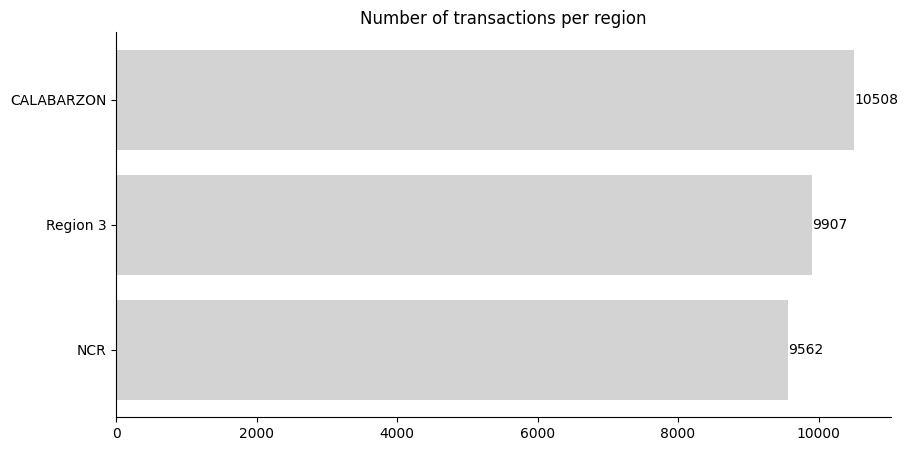

In [37]:
cc_region = pd.DataFrame({'trans_count': cc_fraud_eda['region'].value_counts().sort_values()})

colors_h = ['lightgray'] * 16
colors_h[13:16] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(cc_region.index, cc_region.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per region')
ax.bar_label(hbar)
plt.show()

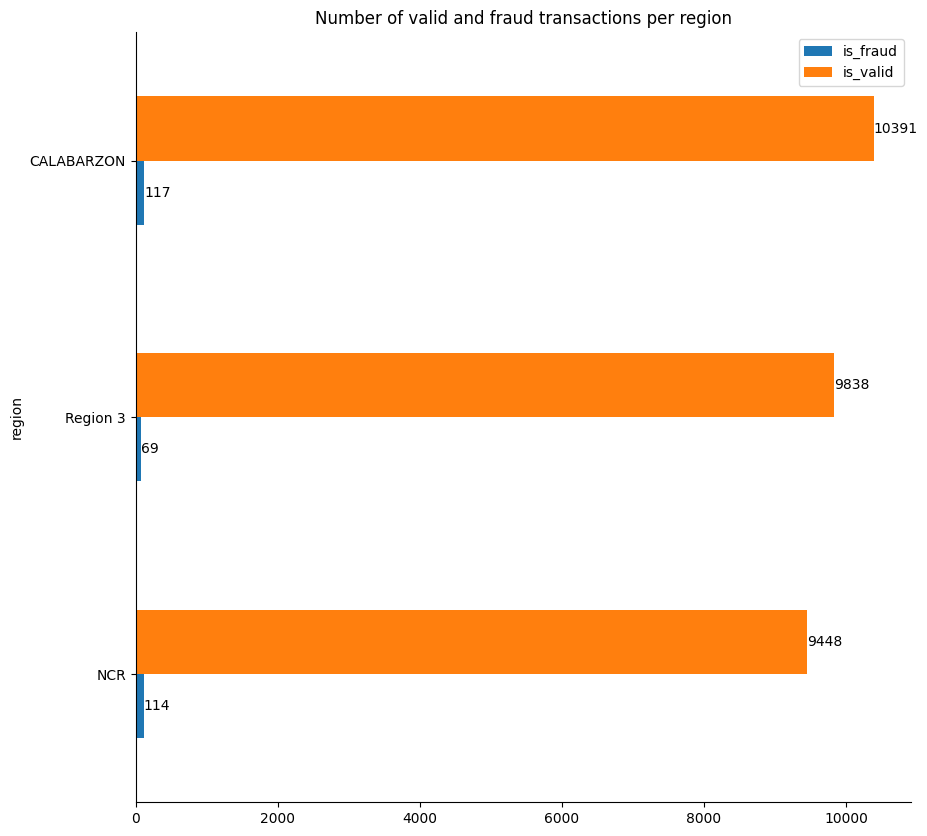

In [38]:
cc_region_2= pd.DataFrame(cc_fraud_eda.groupby('region')['is_fraud'].sum())
cc_region_2 = cc_region_2.join(cc_region).sort_values(['trans_count'])
cc_region_2['is_valid'] = cc_region_2['trans_count'] - cc_region_2['is_fraud']
cc_region_2 = cc_region_2[['is_fraud', 'is_valid']]

ax = cc_region_2.plot.barh(figsize=(10,10), label=['is_fraud', 'is_valid'])
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Number of valid and fraud transactions per region")
plt.show()

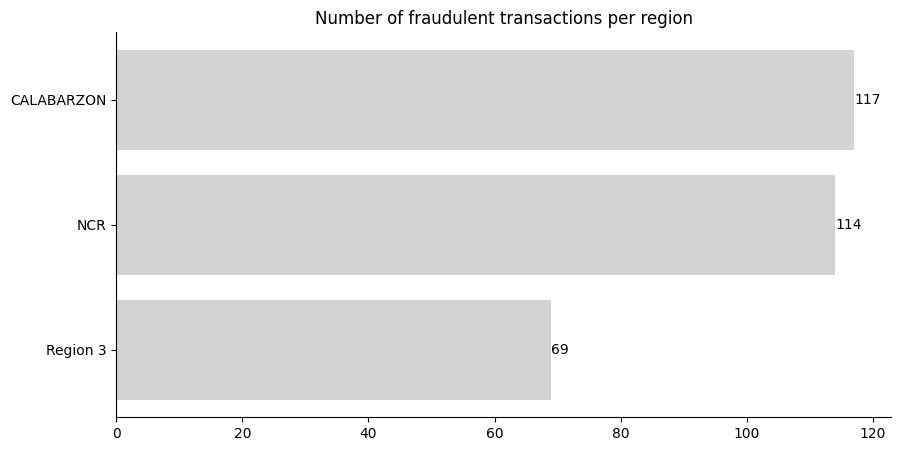

In [40]:
fraud_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]

fraud_trans_amt = fraud_trans.groupby('region')[['trans_date']].count().sort_values('trans_date')
#fraud_trans_amt['amt'] = round(fraud_trans_amt['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(fraud_trans_amt.index, fraud_trans_amt.trans_date, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraudulent transactions per region')
ax.bar_label(hbar)
plt.show()

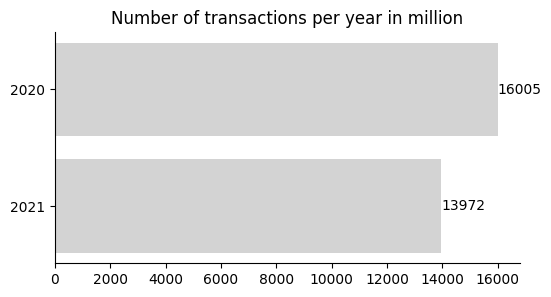

In [41]:
trans_year = pd.DataFrame({'trans_count': cc_fraud_eda['trans_year'].value_counts().sort_values()})
#trans_year['trans_count'] = round(trans_year['trans_count']/1000000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(trans_year.index, trans_year.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per year')
ax.bar_label(hbar)
plt.show()

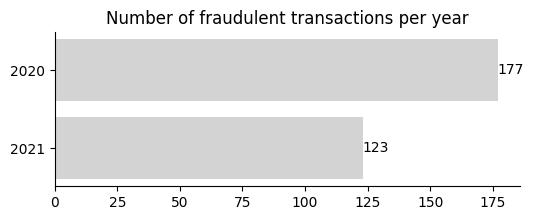

In [43]:
fraud_trans_year = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_year = fraud_trans_year.groupby('trans_year')[['trans_date']].count().sort_values('trans_date')
#fraud_trans_amt_year['amt'] = round(fraud_trans_amt_year['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,2))
hbar = ax.barh(fraud_trans_amt_year.index, fraud_trans_amt_year.trans_date, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraudulent transactions per year')
ax.bar_label(hbar)
plt.show()

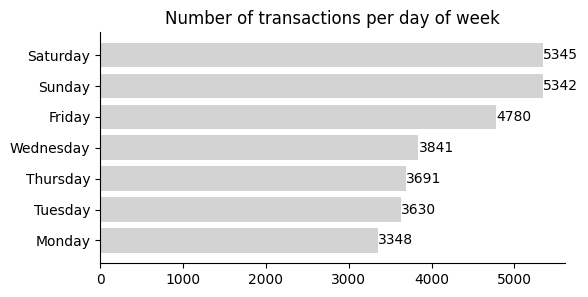

In [44]:
cc_fraud_eda['trans_day_of_week'] = cc_fraud_eda['trans_date'].dt.day_name()

trans_day_of_week = pd.DataFrame({'trans_count': cc_fraud_eda['trans_day_of_week'].value_counts().sort_values()})
#trans_day_of_week['trans_count'] = round(trans_day_of_week['trans_count']/100000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(trans_day_of_week.index, trans_day_of_week.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per day of week')
ax.bar_label(hbar)
plt.show()

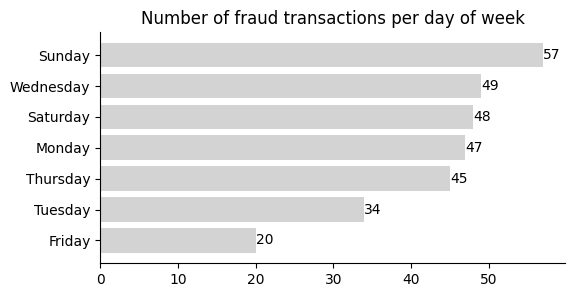

In [45]:
fraud_trans_day_of_week = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]

fraud_trans_day_of_week = pd.DataFrame({'trans_count': fraud_trans_day_of_week['trans_day_of_week'].value_counts().sort_values()})
#trans_day_of_week['trans_count'] = round(trans_day_of_week['trans_count']/100000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_day_of_week.index, fraud_trans_day_of_week.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions per day of week')
ax.bar_label(hbar)
plt.show()

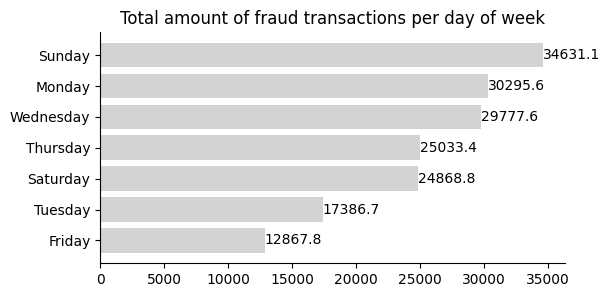

In [48]:
fraud_trans_day_of_week = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_day_of_week = fraud_trans_day_of_week.groupby('trans_day_of_week')[['amt']].sum().sort_values('amt')
#fraud_trans_amt_day_of_week['amt'] = round(fraud_trans_amt_day_of_week['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_amt_day_of_week.index, fraud_trans_amt_day_of_week.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per day of week')
ax.bar_label(hbar)
plt.show()

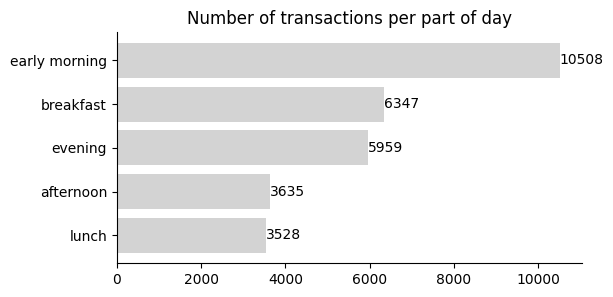

In [49]:
#cc_fraud_eda['trans_day_of_week'] = cc_fraud_eda['trans_datetime'].dt.day_name()

trans_part_of_day = pd.DataFrame({'trans_count': cc_fraud_eda['part_of_day'].value_counts().sort_values()})
#trans_day_of_week['trans_count'] = round(trans_day_of_week['trans_count']/100000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(trans_part_of_day.index, trans_part_of_day.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per part of day')
ax.bar_label(hbar)
plt.show()

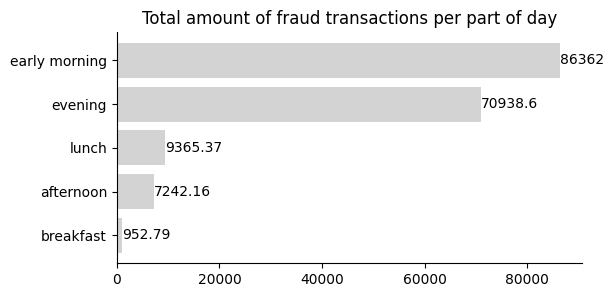

In [50]:
fraud_trans_part_of_day = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_part_of_day = fraud_trans_part_of_day.groupby('part_of_day')[['amt']].sum().sort_values('amt')
#fraud_trans_amt_part_of_day['amt'] = round(fraud_trans_amt_part_of_day['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_amt_part_of_day.index, fraud_trans_amt_part_of_day.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per part of day')
ax.bar_label(hbar)
plt.show()

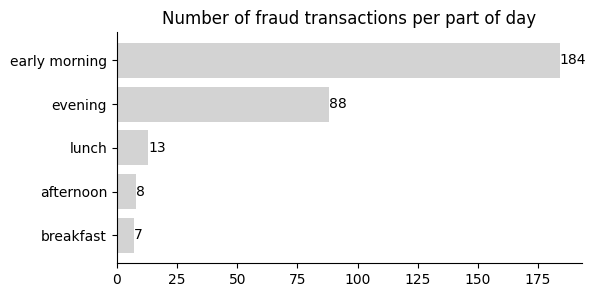

In [51]:
fraud_trans_part_of_day = pd.DataFrame({'trans_count': fraud_trans_part_of_day['part_of_day'].value_counts().sort_values()})

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_part_of_day.index, fraud_trans_part_of_day.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions per part of day')
ax.bar_label(hbar)
plt.show()

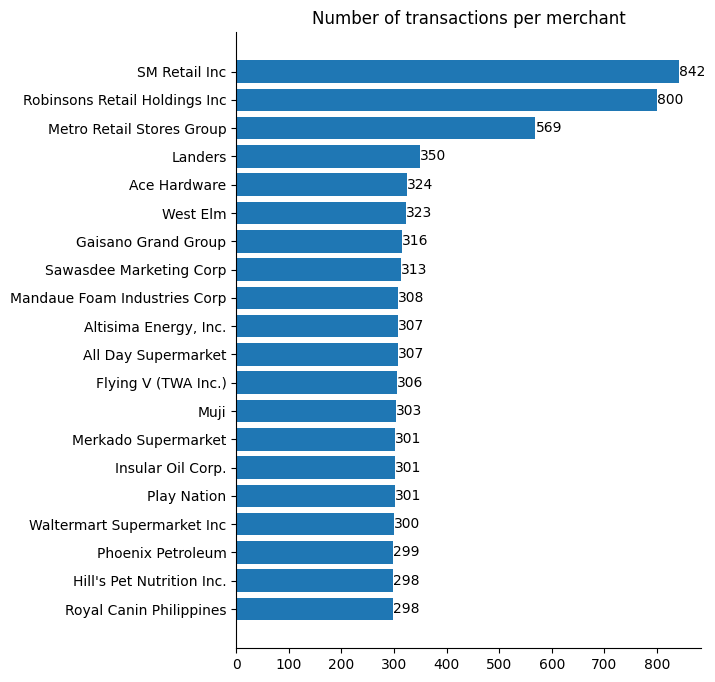

In [52]:
merchant = cc_fraud_eda.groupby('merchant')[['trans_date']].count().sort_values('trans_date').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(merchant.index, merchant.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per merchant')
ax.bar_label(hbar)
plt.show()

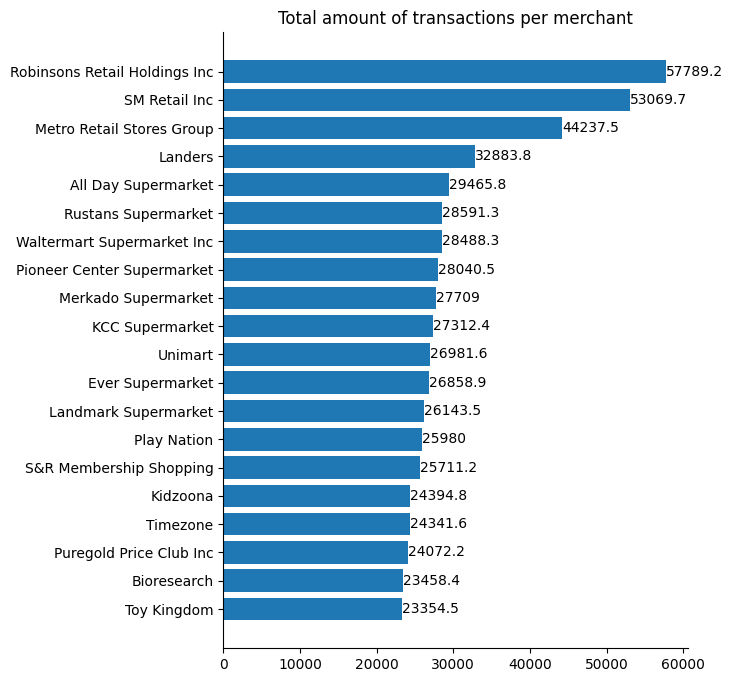

In [54]:
merchant_amt = cc_fraud_eda.groupby('merchant')[['amt']].sum().sort_values('amt').tail(20)
#merchant_amt['amt'] = round(merchant_amt['amt']/1000000,2)
fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(merchant_amt.index, merchant_amt.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of transactions per merchant')
ax.bar_label(hbar)
plt.show()

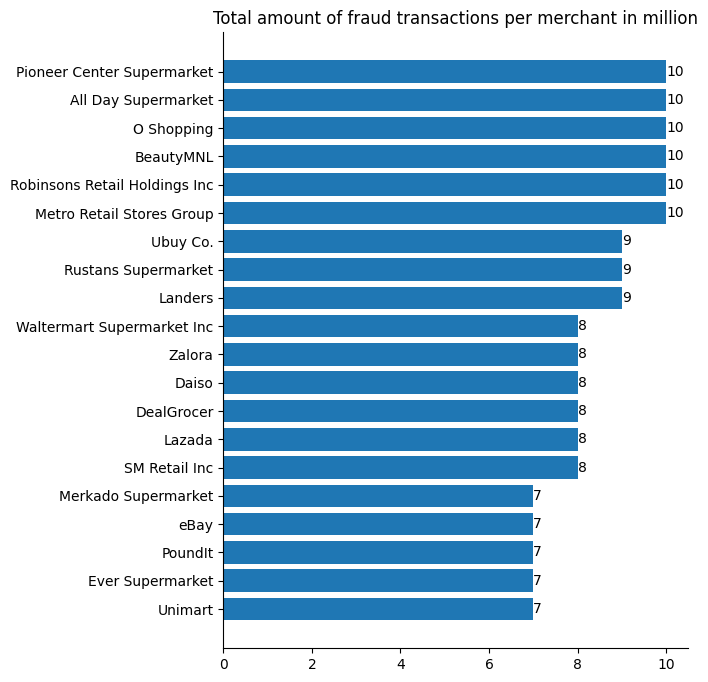

In [55]:
fraud_trans_merchant = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_merchant = fraud_trans_merchant.groupby('merchant')[['trans_date']].count().sort_values('trans_date').tail(20)
#fraud_trans_amt_merchant['amt'] = round(fraud_trans_amt_merchant['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(fraud_trans_amt_merchant.index, fraud_trans_amt_merchant.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per merchant in million')
ax.bar_label(hbar)
plt.show()

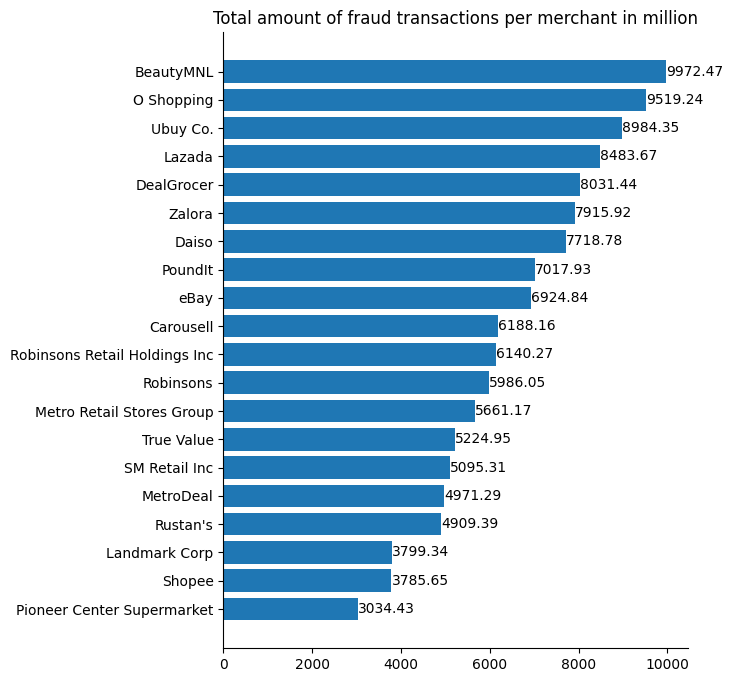

In [56]:
fraud_trans_merchant = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_merchant = fraud_trans_merchant.groupby('merchant')[['amt']].sum().sort_values('amt').tail(20)
#fraud_trans_amt_merchant['amt'] = round(fraud_trans_amt_merchant['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(fraud_trans_amt_merchant.index, fraud_trans_amt_merchant.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per merchant in million')
ax.bar_label(hbar)
plt.show()

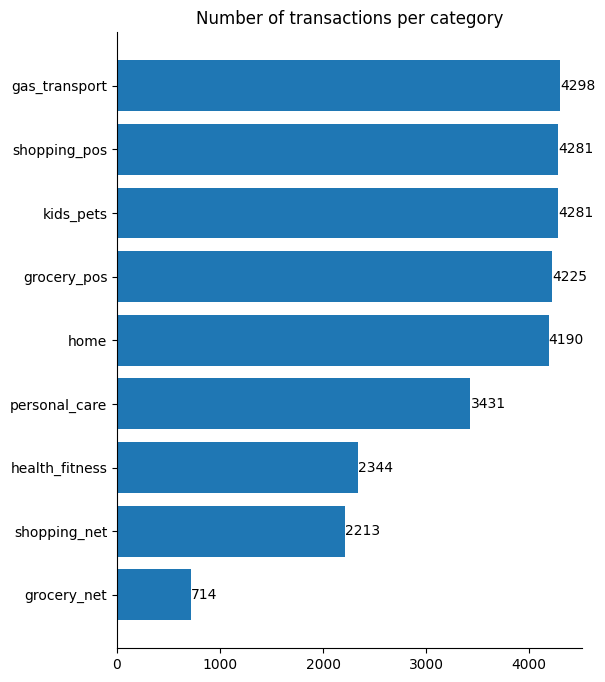

In [57]:
category = cc_fraud_eda.groupby('category')[['trans_date']].count().sort_values('trans_date').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(category.index, category.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per category')
ax.bar_label(hbar)
plt.show()

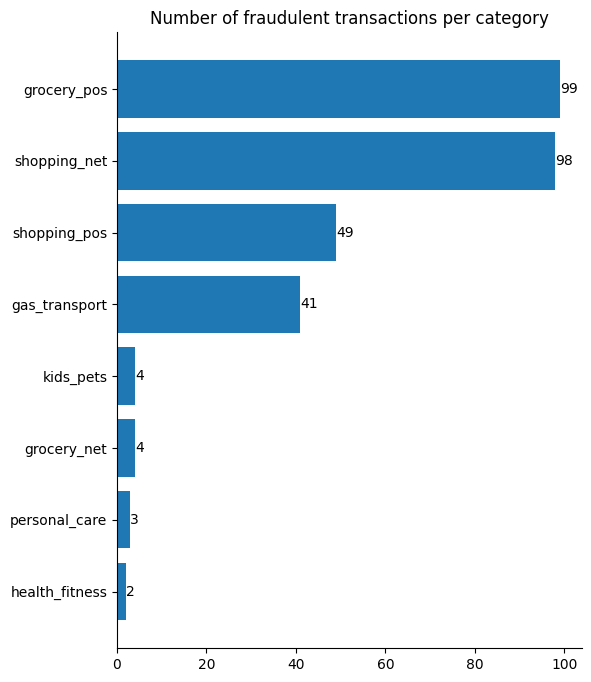

In [59]:
fraud_trans_category = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_category = fraud_trans_category.groupby('category')[['trans_date']].count().sort_values('trans_date').tail(20)
#fraud_trans_amt_category['amt'] = round(fraud_trans_amt_category['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(fraud_trans_amt_category.index, fraud_trans_amt_category.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraudulent transactions per category')
ax.bar_label(hbar)
plt.show()

In [60]:
print(f"The youngest client is {cc_fraud_eda['age'].min()}")
print(f"The oldest client is {cc_fraud_eda['age'].max()}")

The youngest client is 51
The oldest client is 95


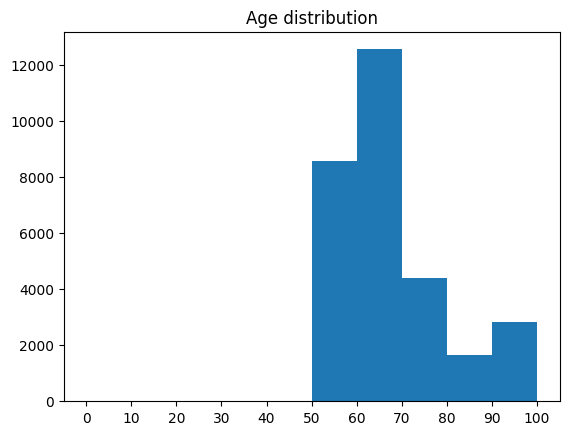

In [62]:
age = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(cc_fraud_eda['age'], bins=age)
plt.xticks(age)
plt.title("Age distribution")
plt.show()

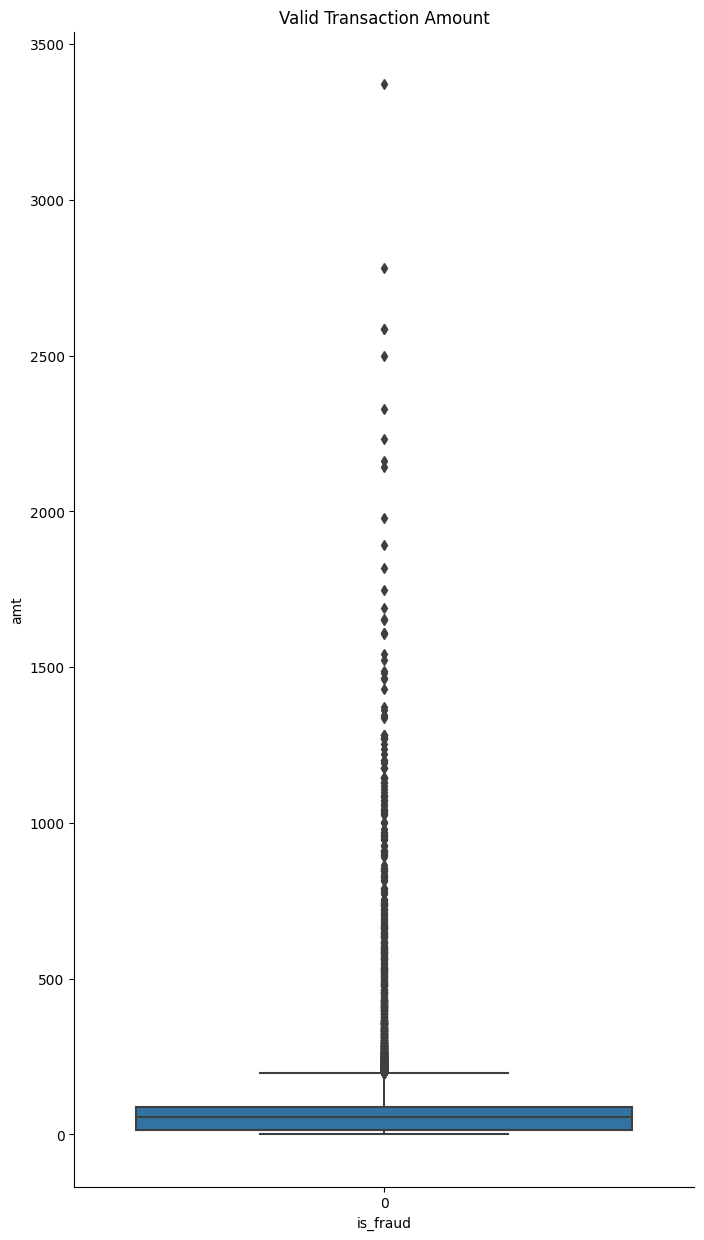

In [64]:
valid_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==0]

plt.figure(figsize=(8, 15))
ax = plt.subplot(111)

sns.boxplot(data=valid_trans, x='is_fraud', y='amt')

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Valid Transaction Amount')
plt.show()

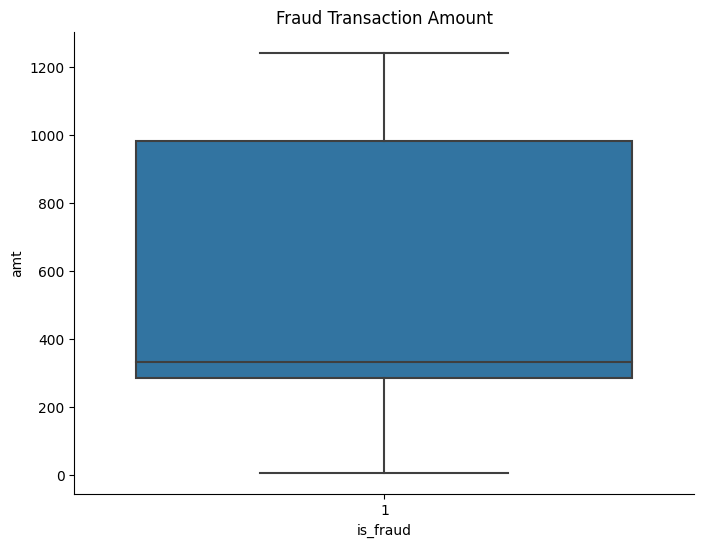

In [63]:
fraud_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=fraud_trans, x='is_fraud', y='amt')

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Fraud Transaction Amount')
plt.show()


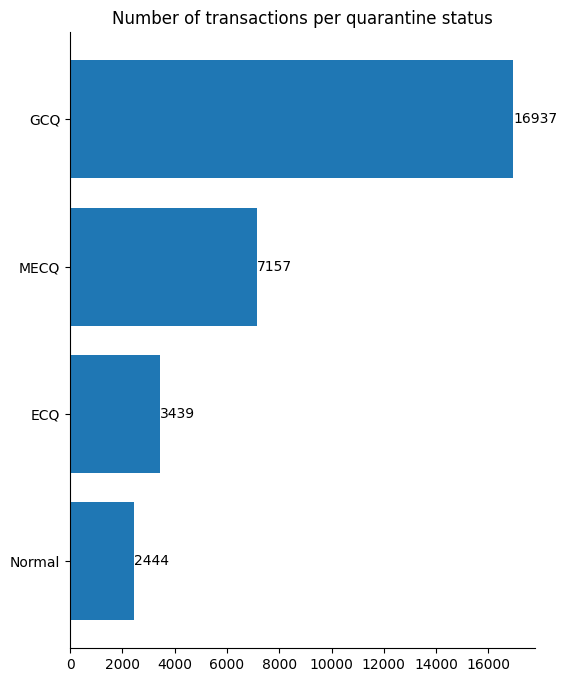

In [67]:
category = cc_fraud_eda.groupby('quarantine_status')[['trans_date']].count().sort_values('trans_date').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(category.index, category.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per quarantine status')
ax.bar_label(hbar)
plt.show()

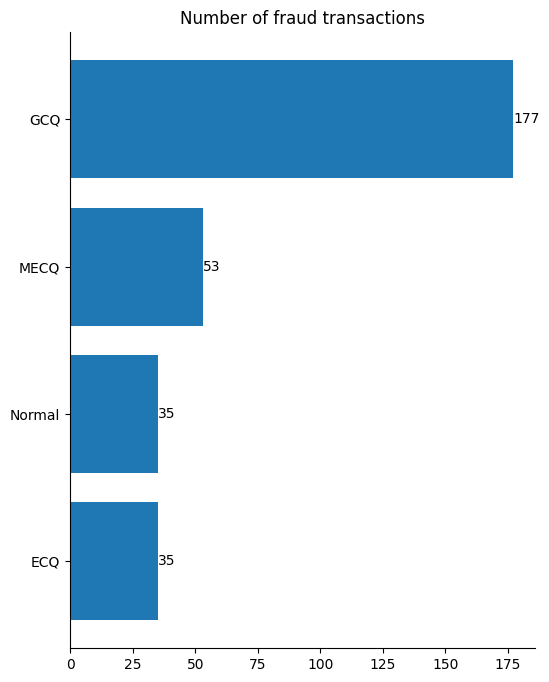

In [68]:
fraud = cc_fraud_eda[cc_fraud_eda['is_fraud'] == 1]
category = fraud.groupby('quarantine_status')[['trans_date']].count().sort_values('trans_date').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(category.index, category.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions')
ax.bar_label(hbar)
plt.show()

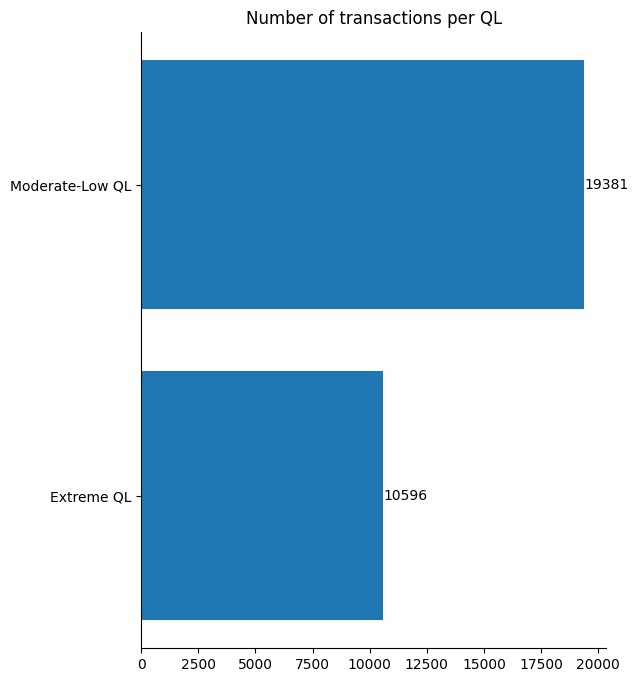

In [70]:
ql = cc_fraud_eda.groupby('QL')[['trans_date']].count().sort_values('trans_date').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(ql.index, ql.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per QL')
ax.bar_label(hbar)
plt.show()

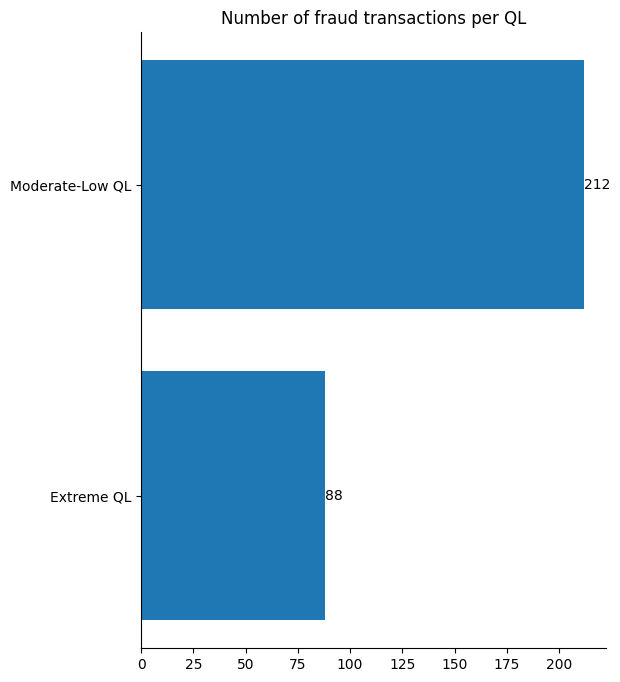

In [71]:
fraud = cc_fraud_eda[cc_fraud_eda['is_fraud'] == 1]
ql = fraud.groupby('QL')[['trans_date']].count().sort_values('trans_date').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(ql.index, ql.trans_date)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions per QL')
ax.bar_label(hbar)
plt.show()